In [70]:
# Referenced eda
# done period-01/j_eda
# done period-01/j_titanic_basic_analysis
# titanic_main

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("paper")   

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import statistics
import math
from random import random
from IPython.display import display
from sklearn.preprocessing import LabelEncoder

d_train = pd.read_csv('train.csv')
d_test = pd.read_csv('test.csv')
data_cleaner = [d_train, d_test]

In [71]:
def prtSep(length=20, marker="-"):
    print( marker * length)

In [72]:
def baseline_analysis():
    # フィールドの比較
    #   テストデータ: 
    #       ドロップ対象：説明変数, 訓練データに存在していない目的変数
    display(d_train.head())
    display(d_test.head())
    prtSep()
    
    # レコードフォーマットの確認
    print("Shape of Train:" , d_train.shape)
    print("Shape of Test:" , d_test.shape)
    prtSep()

    # 項目について基本情報確認
    print(d_train.info())
    prtSep()

    print(d_test.info())
    prtSep()
       
    # 項目の比較
    #   比例：平均値および分散に大きな違いがあるか、外れ値はないか
    print(d_train.describe())
    prtSep()
    print(d_test.describe())
    prtSep()
    
    # null値の確認
    print(d_train.isnull().sum())
    prtSep()
    print(d_test.isnull().sum())
    prtSep()    

In [73]:
def ba_target(target_field):
    # 目的変数
    print("Target Ratio - Train:")
    print(d_train[target_field].value_counts())
    print(d_train[target_field].value_counts(normalize=True))
  
    sns.countplot(d_train[target_field])

    prtSep()

In [74]:
def ba_categoral(target_field):
    # 訓練データ
    #     カテゴリの数: 種類が多すぎる場合には集約、種類が少ない場合には他の値と合わせてFE 例) 男女で16歳以下を"子供"とする
    #     カテゴリの値: エンコーディングの必要性
    #     不明値の存在: 例 性別に三つ目の値が混じっている
    for col in data1_x:
        if d_train[col].dtype != 'float64' and col != target_field:
            print(d_train[col].value_counts())
            print(d_train[col].value_counts(normalize=True))
            prtSep()
            print(d_test[col].value_counts())
            print(d_test[col].value_counts(normalize=True))
            prtSep()
   
    fig = plt.figure(figsize=(30, 60))
    i = 1
    for col in data1_x:
        if d_train[col].dtype != 'float64' and col != target_field:
            fig.add_subplot(10,3,i)
            ax = sns.countplot(x=col, data=d_train);
            i += 1
 
            fig.add_subplot(10,3,i)
            ax = sns.countplot(x=col, data=d_test);
            i += 1

            ax = fig.add_subplot(10,3,i)
            sns.countplot(x=col, data=d_train,hue=target_field);
            i += 1  

In [75]:
def ba_categoral_cor(target_field):
    target_opposit="Not"+target_field       
    # Survival Correlation for Categoral
    for x in data1_x:
        if d_train[x].dtype != 'float64':
            print(target_field + ' Correlation by:', x)
            print(d_train[[x, target_field]].groupby(x, as_index=False).mean())
            print('-'*10, '\n')
            d_train[target_opposit] = 1 - d_train[target_field]
            d_train.groupby(x).agg('mean')[[target_field, target_opposit]].plot(kind='bar', figsize=(25, 7), 
                                                           stacked=True);

In [76]:
def ba_conti(target_field):
    i=1
    fig = plt.figure(figsize=(20, 30))
    for x in data1_x:
        if d_train[x].dtype == 'float64' :
            ax = fig.add_subplot(4,2,i)

            ax.hist(d_train[x].dropna(), rwidth=0.5)
            #!!! 情報は次のhue化したhistに含まれているのでここはboxplotに変更する
            ax.set_xlabel(x)
   
            ax = fig.add_subplot(4,2,i+1)
            splitAsTarget = []

             # データセットを生存者で分割
            for i in [0, 1]:
                splitAsTarget.append(d_train[d_train[target_field] == i])
            tmp  = [i[x].dropna() for i in splitAsTarget]
            ax.set_xlabel(x)
            ax.hist(tmp, histtype="barstacked", bins=10, rwidth=0.5, color=['red', 'blue'], label=['Not ' + target_field, target_field])
            ax.legend()
            i += 2

In [77]:
def exAge(df, min, max):
    data = df[(df['Age'] >= min) & (df['Age'] <= max)]
    return data[['Age', 'Name', 'Survived']]
 
def exAgeSurvived(df, min, max):
    data = df[(df['Age'] >= min) & (df['Age'] <= max) & (df['Survived'] == 1)]
    return data[['Age', 'Name', 'Survived']]
 
def calAgeSurvivedRatio(df, min, max):
    # print(str(min) + "Age ~ " + str(max) + " All：" + str(len(exAge(df, min, max))))
    # print(str(min) + "Age ~ " + str(max) + " Survived：" + str(len(exAgeSurvived(df, min, max))))
    df_1=exAge(df, min, max)
    if (len(df_1) == 0):
        return(str(min) + "Age ~ " + str(max) + " Survived Ratio：Not available")
    else:
        return(str(min) + "Age ~ " + str(max) + " Survived Ratio：" + str(100 * len(exAgeSurvived(df, min, max)) / len(exAge(df, min, max))) + "%")

    
def ba_age():    
    for i in range(0,100,10):
        print(calAgeSurvivedRatio(d_train, i, i+10))
    
    plt.figure(figsize=(20, 4))
    # 年齢のヒストグラム
    plt.subplot(1,3,1)
    plt.hist(d_train["Age"].dropna(), bins=10, rwidth=0.5)
    plt.xlabel("Age")

    # データセットを生存者で分割
    splitAsSurvived = []
    for i in [0, 1]:
        splitAsSurvived.append(d_train[d_train.Survived == i])
    plt.subplot(1,3,2)
    tmp  = [i["Age"].dropna() for i in splitAsSurvived]
    
    plt.xlabel("Age")
    plt.hist(tmp, histtype="barstacked", bins=10, rwidth=0.5, color=['red', 'blue'], label=['not survived', 'survived'])
    plt.legend()
 
    # 性差 vs 年齢
    splitAsSex = [] # 性別毎にデータセットを分割するためのリストを用意

    for i in ["male", "female"]: # 0:male, 1:female
        splitAsSex.append(d_train[d_train.Sex == i])

    tmp = [i.Age.dropna() for i in splitAsSex]

    plt.subplot(1,3,3)
    plt.hist(tmp, histtype="barstacked", bins=10, rwidth=0.5, color=['pink', 'skyblue'], label=['female', 'male'])
    plt.xlabel("Age")
    plt.legend() #凡例表示
    # plt.show()

In [78]:
def ba_sex():
    all_x = len(d_train)
    all_male = len(d_train[d_train["Sex"]=='male'])
    all_female = len(d_train[d_train["Sex"]=='female'])
    live_male = len(d_train[((d_train['Sex'] == 'male') & (d_train['Survived'] == 1))])
    live_female = len(d_train[((d_train['Sex'] == 'female') & (d_train['Survived'] == 1))])
    live_all = len(d_train[d_train["Survived"]==1])

    print("#### Survive Ratio - Male ####")
    print("Male - all: ", all_male)
    print("Male - survive: ", live_male)
    print("Male - ratio: ", 100 * live_male / all_male, "%")

    print("#### Survive Ratio - Female ####")
    print("Female - all: ", all_female)
    print("Female - survive: ", live_female)
    print("Female - ratio: ", 100 * live_female / all_female, "%")

    print("#### Survive Ratio - All ####")
    print("Female - all: ", all_x)
    print("Female - survive: ", live_all)
    print("Female - ratio: ", 100 * live_all / all_x, "%")

    # visual : Sex, Absolute
    plt.figure()
    d_train["Sex"].value_counts().plot(kind='bar')
    
    # visual : 
    #    Sex by survived, Absolute, Stacked
    #    Sex by survived, Ratio, Stacked

    d_train['Died'] = 1 - d_train['Survived']
 
    d_train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', stacked=True);
    d_train.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', stacked=True);
                                                                
                                                                      
    # visual : Sex by Survived, Ratio
    plt.figure()
    sns.barplot(x="Sex",y="Survived",data=d_train)
    plt.show()

In [79]:
def extAll(df, val, target):
  return df[(df[target] == val)]
 
def extSurvived(df, val, target):
  return df[((df[target] == val) & (df['Survived'] == 1))]
 
# 階級ごとの生存者率
def calSurvivedRate(df, val, target):
    #print(target + "-" + val + " ： " + str(len(extAll(df, val, target))))
    # print(target + "-" + val + " ： " + str(len(extSurvived(df, val, target))))
    return str(100 * len(extSurvived(df, val, target)) / len(extAll(df, val, target))) + "%"

def ba_embarked():
    for i in ["S", "C", "Q"]:
        print(i, ":", calSurvivedRate(d_train, i, "Embarked"))
    
    sns.barplot(x="Embarked",y="Survived",data=d_train)

In [80]:
def ba_name():
    # Name
    print(d_train['Name'].head())
    prtSep()
    d_train['Name_Title'] = d_train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
    print("Count by Name Title:")
    print(d_train['Name_Title'].value_counts())
    prtSep()
    print("Survied Ratio by Name Title:")
    d_train['Survived'].groupby(d_train['Name_Title']).mean()
    d_train.drop(['Name_Title'], axis=1, inplace=True)

In [81]:
def clearning_correcting():
    print("Not necessary")

In [82]:
def cleaning_completing_view():
    print('Train columns with null values:\n', d_train.isnull().sum())
    print("-"*10)

    print('Test/Validation columns with null values:\n', d_test.isnull().sum())
    print("-"*10)

    # data_raw.describe(include = 'all')
    
def cleaning_completing():
    ###COMPLETING: complete or delete missing values in train and test/validation dataset （欠損値の補完、または欠損のあるデータ行削除を、学習データ・テストデータ・提出用の検証データに対して実施する）
    for dataset in data_cleaner:    
        #complete missing age with median （Ageの欠損を、中央値で補完）
        dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

        #complete embarked with mode （Embarkedの欠損を、最頻値で補完）
        dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

        #complete missing fare with median （Fareの欠損を、中央値で補完）
        dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

In [83]:
def cleaning_converting_fe():
    for dataset in data_cleaner:
        #Discrete variables
        dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

        dataset['IsAlone'] = 1 #initialize to yes/1 is alone
        dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

        #quick and dirty code split title from name: （即席の汚いコードで、名前から、titleを抜き出す） http://www.pythonforbeginners.com/dictionary/python-split
        dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


        #Continuous variable bins; qcut vs cut: （連続値を離散化する、頻度基準 vs 値域基準） https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
        #Fare Bins/Buckets using qcut or frequency bins:（） https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
        dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

        #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
        dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    
    #cleanup rare title names （抜き出したtitleをキレイに整える）
    #print(data1['Title'].value_counts())
    stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
    title_names = (d_train['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

    #apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: （apply関数とlambda関数は、即席の汚いコードで、検索hitが少ない行数の値を、任意の値で置き換えることができる） https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
    d_train['Title'] = d_train['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
    print(d_train['Title'].value_counts())
    print("-"*10)

    #preview data again
    print(d_train.info())
    print(d_train.sample(10))

In [84]:
def eda_cor():
    for x in data1_x:
        if d_train[x].dtype != 'float64':
            if d_train[x].dtype != 'float64':
                print("Survival Correlation by:", x)
                print(d_train[[x, Target[0]]].groupby(x, as_index=False).mean())
                print('-'*10, '\n')
                
    # using crosstabs
    print(pd.crosstab(d_train['Title'], d_train[Target[0]]))

In [85]:
def eda_plot_conti():
    plt.figure(figsize=[16,12])
    wrt_boxplot(plt, 231, 'Fare', 'Fare Boxplot', 'Fare ($)')
    wrt_boxplot(plt, 232, 'Age', 'Age Boxplot', 'Age (Years)')
    wrt_boxplot(plt, 233, 'FamilySize', 'Family Size Boxplot', 'Family Size (#)')
    wrt_stackedhist(plt, 234, 'Fare', 'Fare ($)', '# of Passengers')
    wrt_stackedhist(plt, 235, 'Age', 'Age (Years)', '# of Passengers')
    wrt_stackedhist(plt, 236, 'FamilySize', 'Family Size (#)', '# of Passengers')

def wrt_boxplot(wplt, position, field, title, ylabel):
    wplt.subplot(position)
    wplt.boxplot(x=d_train[field], showmeans=True, meanline=True)
    wplt.title(title)
    wplt.ylabel(ylabel)
    
def wrt_stackedhist(wplt, position, field, xlabel, ylabel):
    wplt.subplot(position)
    wplt.hist(x = [d_train[d_train['Survived']==1][field], d_train[d_train['Survived']==0][field]], stacked=True, label=['Survived', 'Dead'])
    wplt.title(field + ' Histogram by Survival')
    wplt.xlabel(xlabel)
    wplt.ylabel(ylabel)
    wplt.legend()

In [100]:
def eda_plot_mult():
    fig, saxis = plt.subplots(2, 3,figsize=(16,12))

    # sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0,0])
    # sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data1, ax = saxis[0,1])
    # sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])
    
    sns.pointplot(x = 'Embarked', y = 'Survived',  data=d_train, ax = saxis[0,0])
    sns.pointplot(x = 'Pclass', y = 'Survived',  data=d_train, ax = saxis[0,1])
    sns.pointplot(x = 'IsAlone', y = 'Survived', data=d_train, ax = saxis[0,2])
    
    sns.pointplot(x = 'FareBin', y = 'Survived',  data=d_train, ax = saxis[1,0])
    sns.pointplot(x = 'AgeBin', y = 'Survived',  data=d_train, ax = saxis[1,1])
    sns.pointplot(x = 'FamilySize', y = 'Survived', data=d_train, ax = saxis[1,2])

In [116]:
def eda_plot_mult3():
    # Cat x Conti x Cat
    fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

    sns.violinplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = d_train, split = True, ax = axis1)
    #sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = d_train, ax = axis1)
    axis1.set_title('Pclass vs Fare Survival Comparison')

    sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = d_train, split = True, ax = axis2)
    axis2.set_title('Pclass vs Age Survival Comparison')

    sns.violinplot(x = 'Pclass', y = 'FamilySize', hue = 'Survived', data = d_train, split = True, ax = axis3)
    #sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = d_train, ax = axis3)
    axis3.set_title('Pclass vs Family Size Survival Comparison')
    plt.show()
    
    # Cat x Cat x Cat 
    fig, qaxis = plt.subplots(1,3,figsize=(14,12))
    sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=d_train, ax = qaxis[0])
    axis1.set_title('Sex vs Embarked Survival Comparison')

    sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=d_train, ax  = qaxis[1])
    axis1.set_title('Sex vs Pclass Survival Comparison')

    sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=d_train, ax  = qaxis[2])
    axis1.set_title('Sex vs IsAlone Survival Comparison')

In [131]:
def eda_plot_mult4():
    #how does embark port factor with class, sex, and survival compare
    #facetgrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
    e = sns.FacetGrid(d_train, col = 'Embarked')
    e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
    e.add_legend()
    
    h = sns.FacetGrid(d_train, row = 'Sex', col = 'Pclass', hue = 'Survived')
    h.map(plt.hist, 'Age', alpha = .75)
    h.add_legend()

In [122]:
def eda_conti_age():
    #plot distributions of age of passengers who survived or did not survive
    a = sns.FacetGrid( d_train, hue = 'Survived', aspect=4 )
    a.map(sns.kdeplot, 'Age', shade= True )
    a.set(xlim=(0 , d_train['Age'].max()))
    a.add_legend()

In [128]:
def eda_pair():
    pp = sns.pairplot(d_train, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
    pp.set(xticklabels=[])

In [135]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
          # df.corr.abs()
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NotSurvived,Died,FamilySize,IsAlone,Title,FareBin,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"


,PassengerId,Unnamed: 1,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]"
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]"
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,Mr,"(7.896, 14.454]","(60.8, 76.0]"
3,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1,Mr,"(7.896, 14.454]","(15.2, 30.4]"
4,896,NaN,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]"


--------------------
Shape of Train: (891, 19)
Shape of Test: (418, 17)
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  NotSurvived  891 non-null    int64   
 13  Died         891 non-null    int64   
 14  FamilySize   891 non-null    int64   
 15  IsAlone      891 non-null    int64   
 16  Title        891 non-nu

10Age ~ 20 Survived Ratio：37.60683760683761%
20Age ~ 30 Survived Ratio：32.93838862559242%
30Age ~ 40 Survived Ratio：43.888888888888886%
40Age ~ 50 Survived Ratio：39.39393939393939%
50Age ~ 60 Survived Ratio：42.30769230769231%
60Age ~ 70 Survived Ratio：28.571428571428573%
70Age ~ 80 Survived Ratio：14.285714285714286%
80Age ~ 90 Survived Ratio：100.0%
90Age ~ 100 Survived Ratio：Not available
#### Survive Ratio - Male ####
Male - all:  577
Male - survive:  109
Male - ratio:  18.890814558058924 %
#### Survive Ratio - Female ####
Female - all:  314
Female - survive:  233
Female - ratio:  74.20382165605096 %
#### Survive Ratio - All ####
Female - all:  891
Female - survive:  342
Female - ratio:  38.38383838383838 %


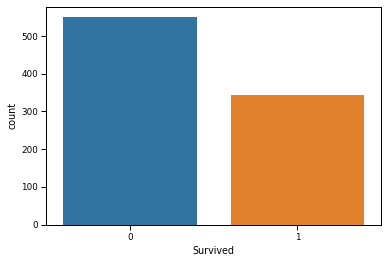

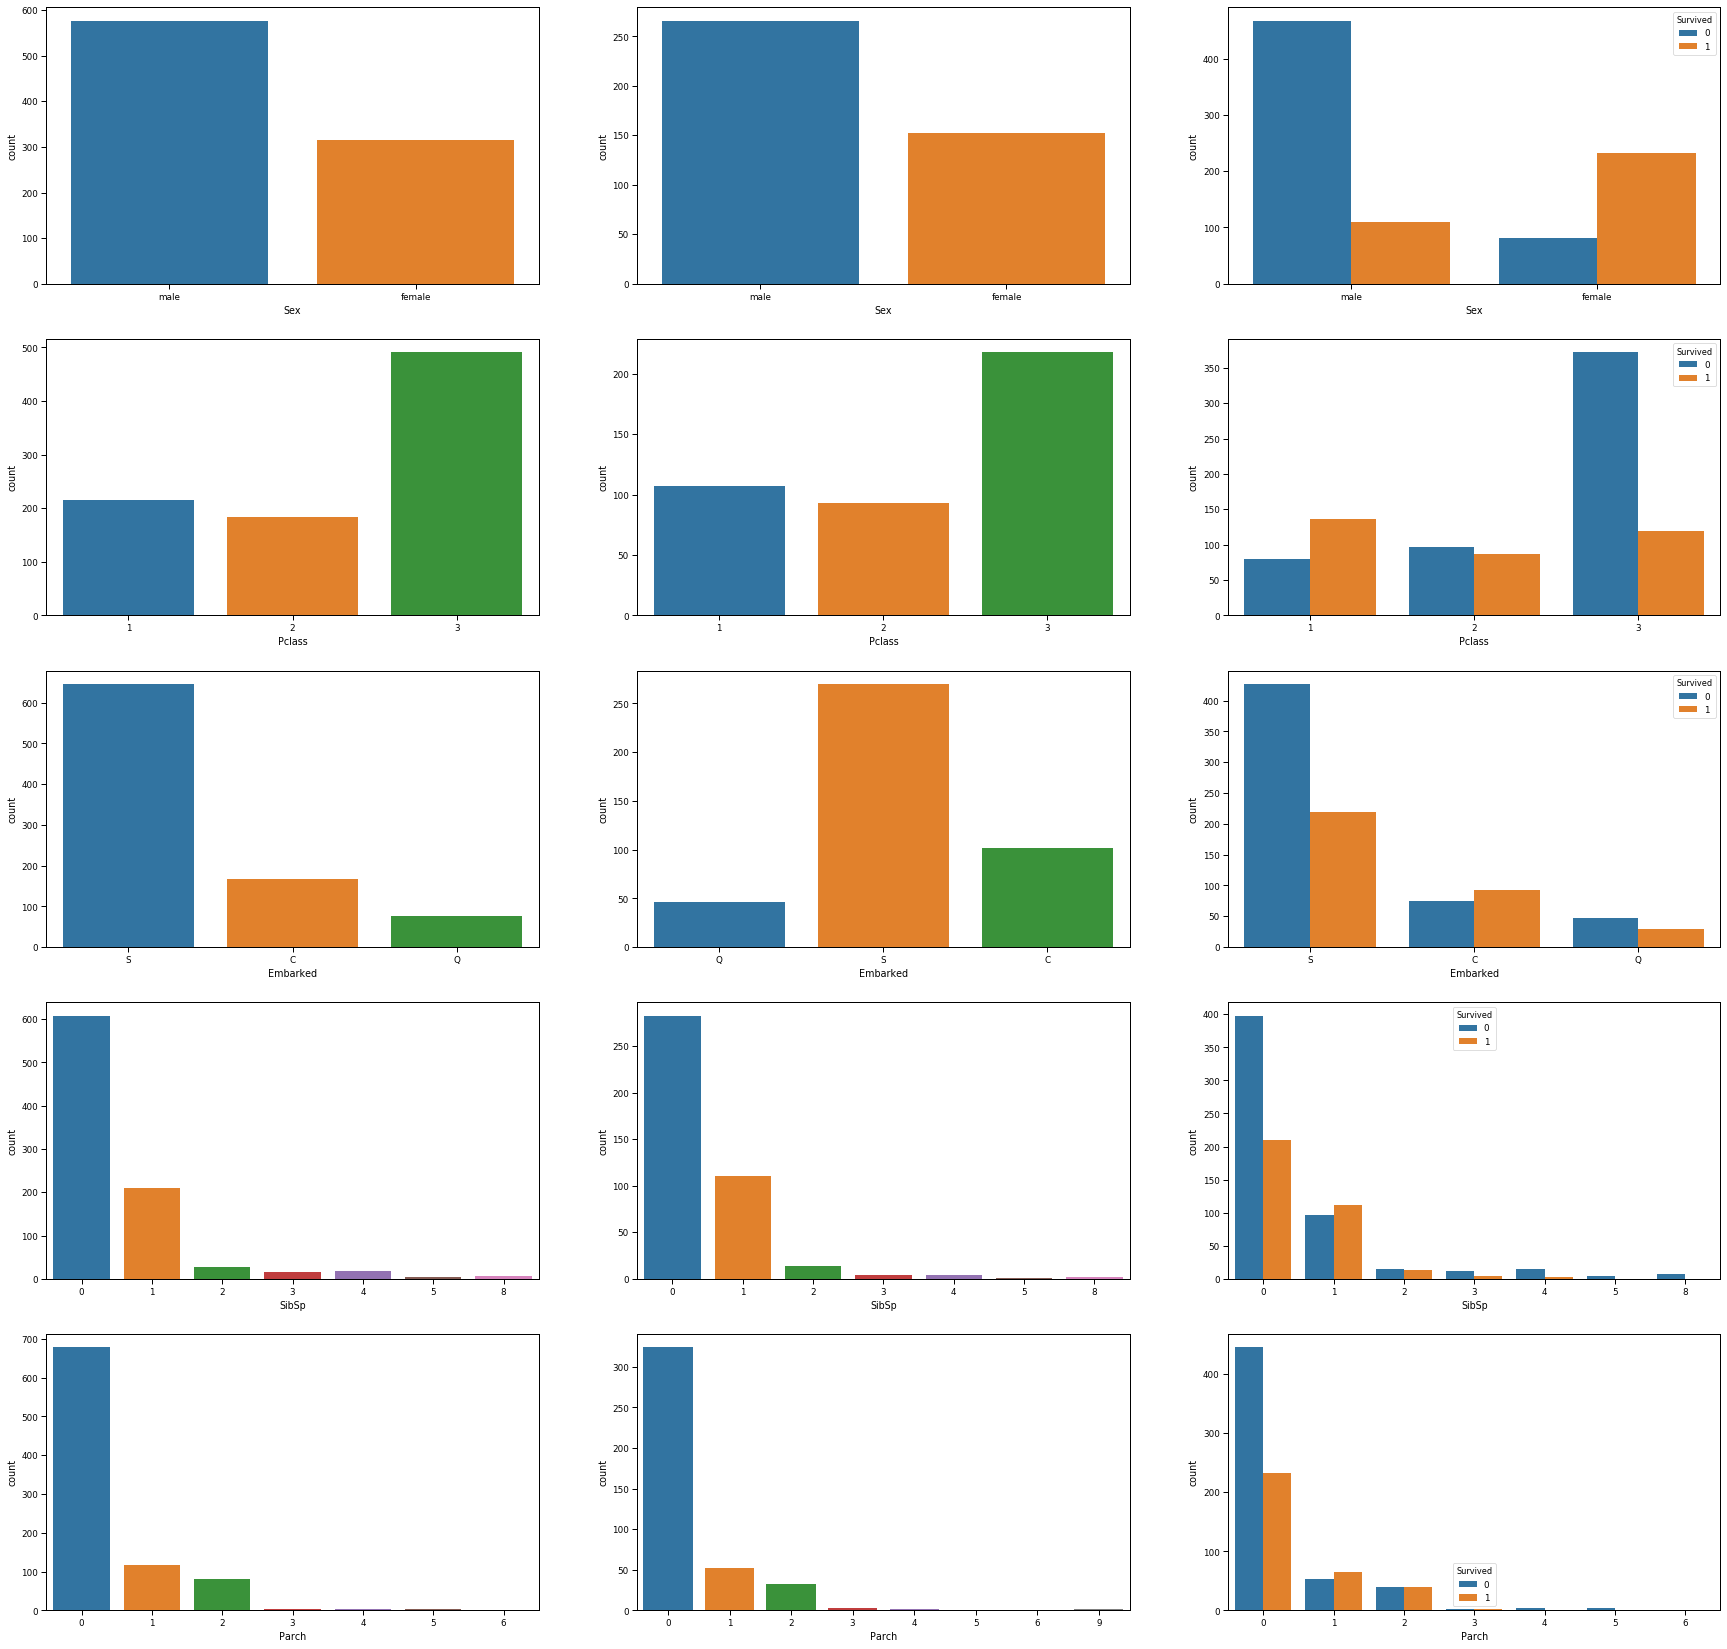

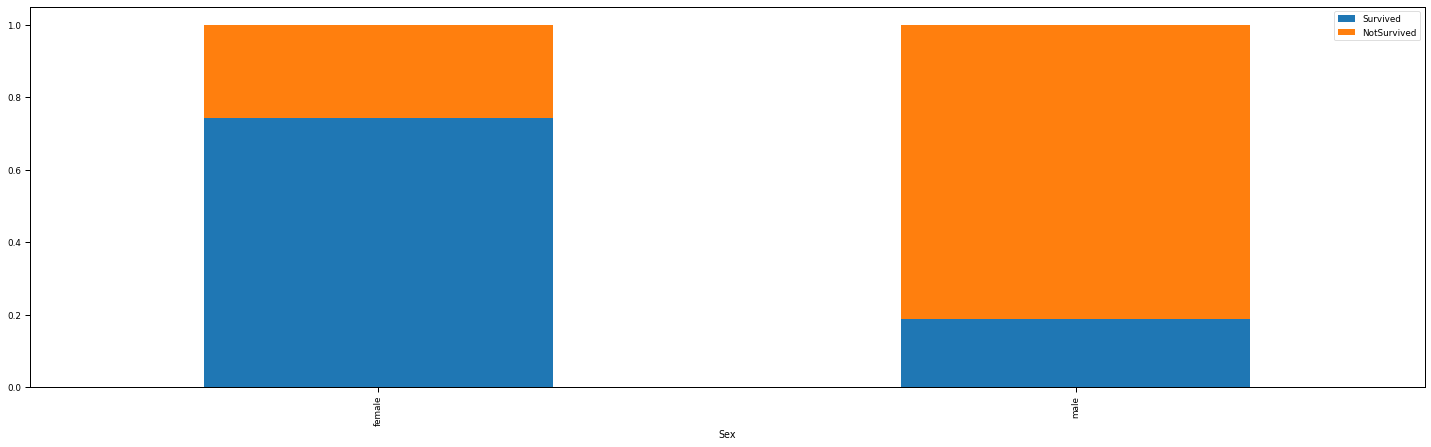

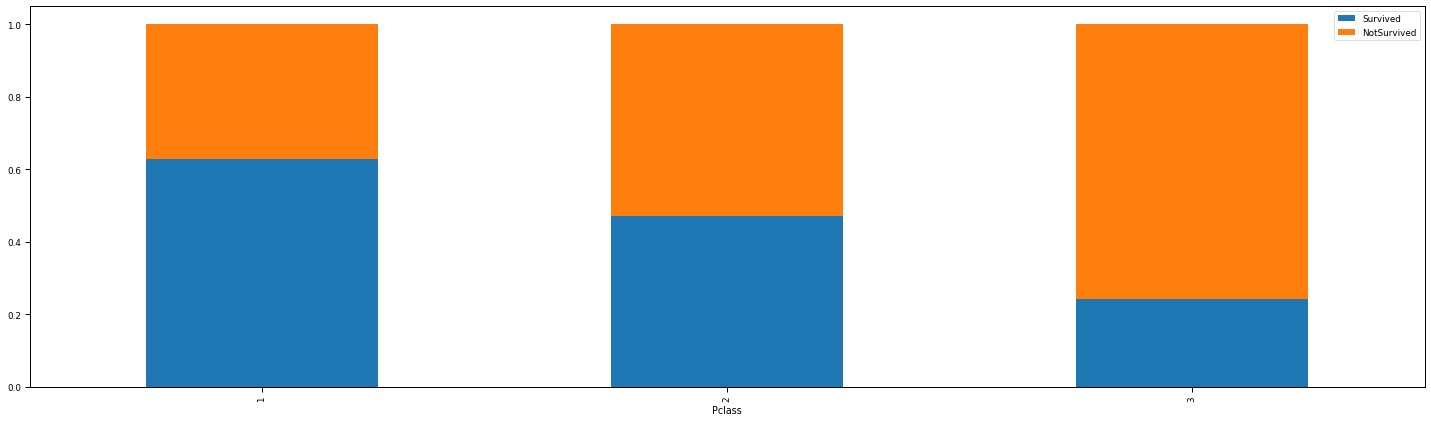

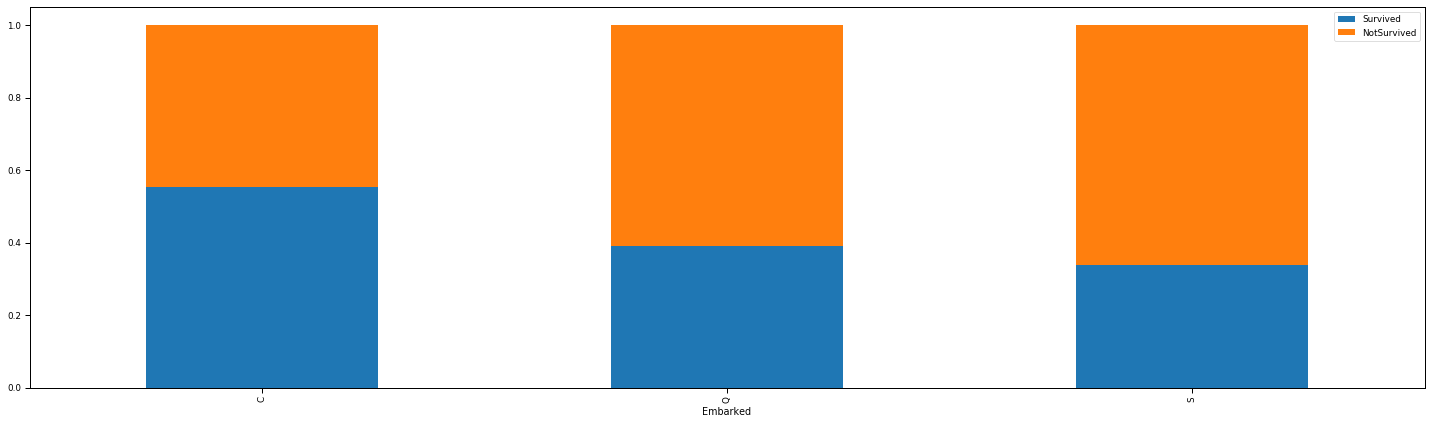

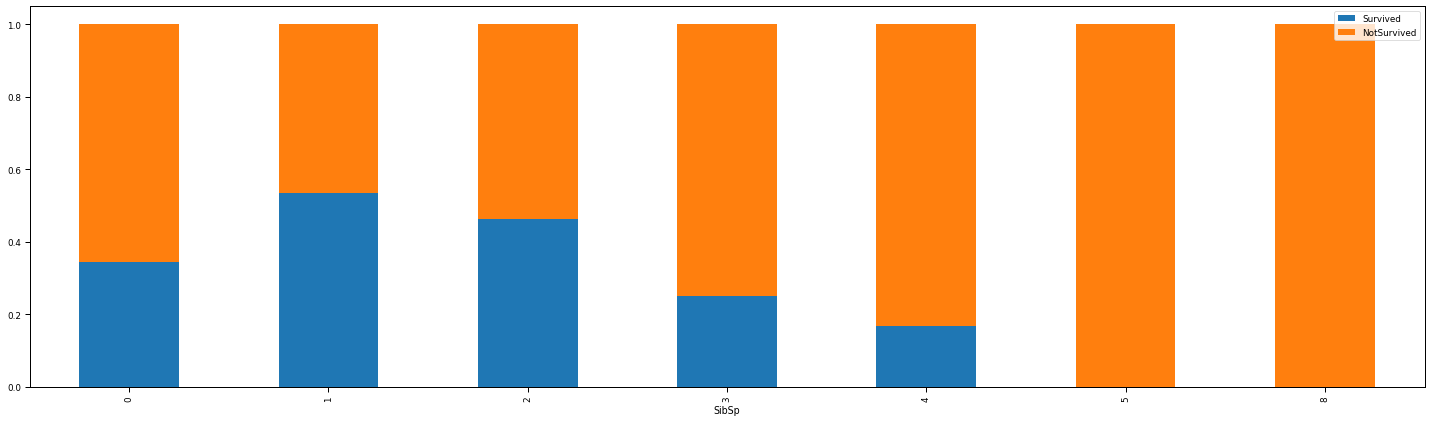

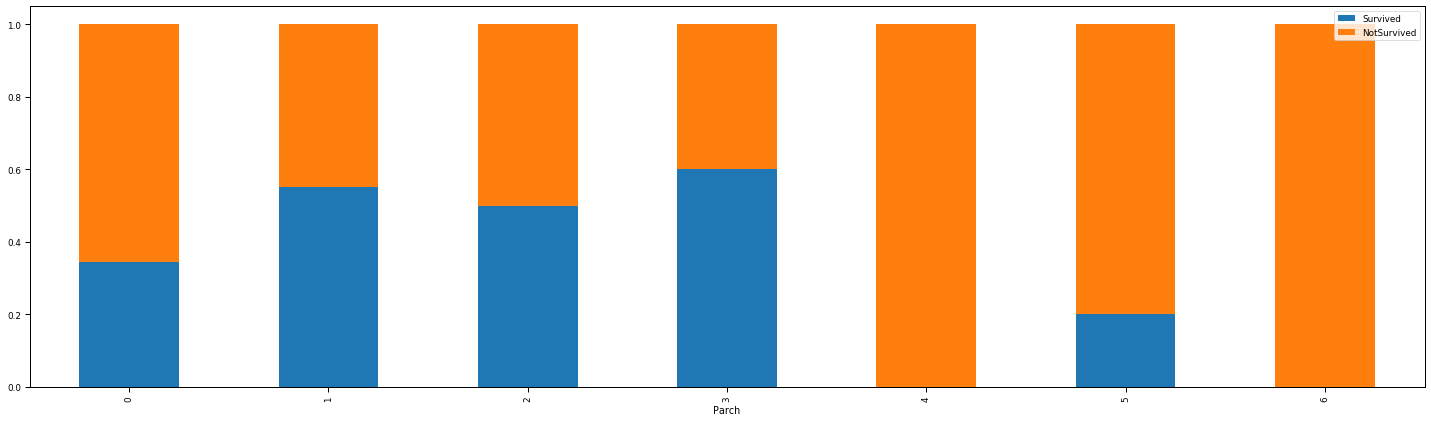

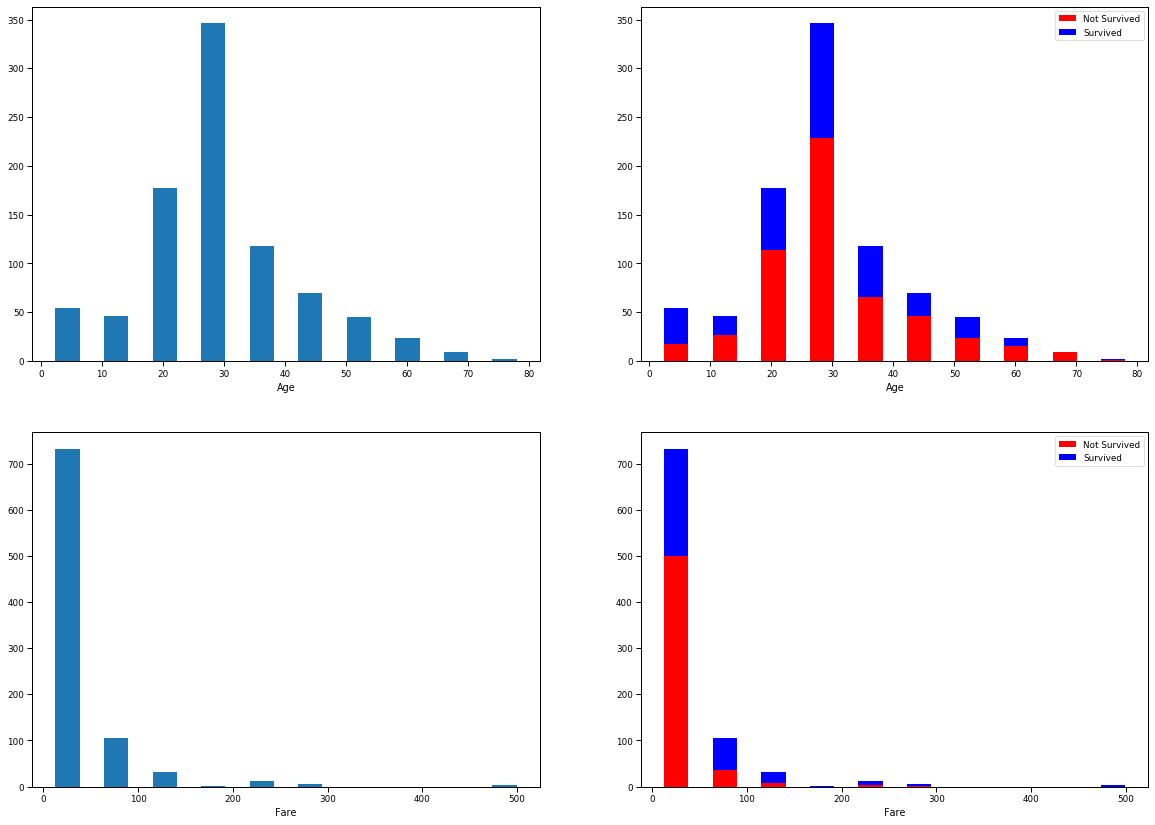

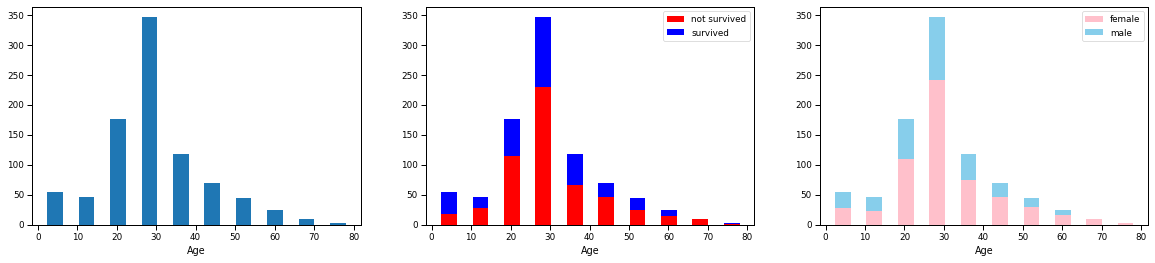

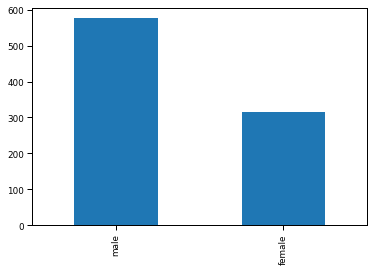

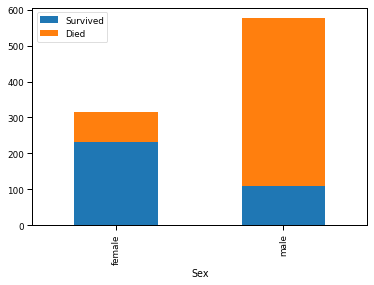

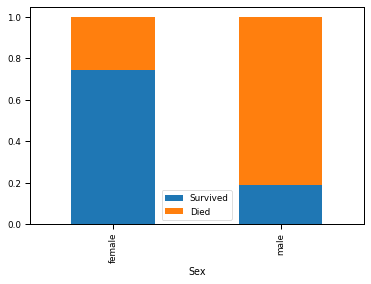

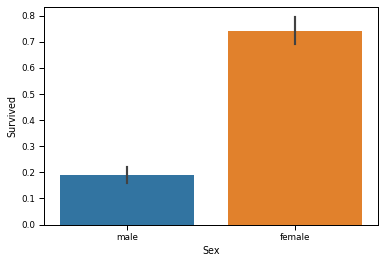

S : 33.90092879256966%
C : 55.357142857142854%
Q : 38.96103896103896%
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object
--------------------
Count by Name Title:
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Lady.          1
Don.           1
Capt.          1
the            1
Sir.           1
Ms.            1
Mme.           1
Jonkheer.      1
Name: Name_Title, dtype: int64
--------------------
Survied Ratio by Name Title:
Not necessary
Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)



---------- 

Survived    0    1
Title             
Master     17   23
Misc       15   12
Miss       55  127
Mr        436   81
Mrs        26   99


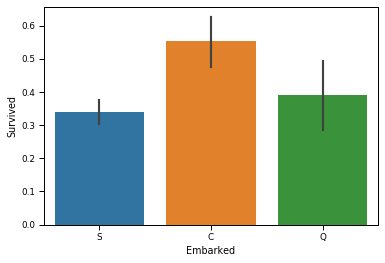

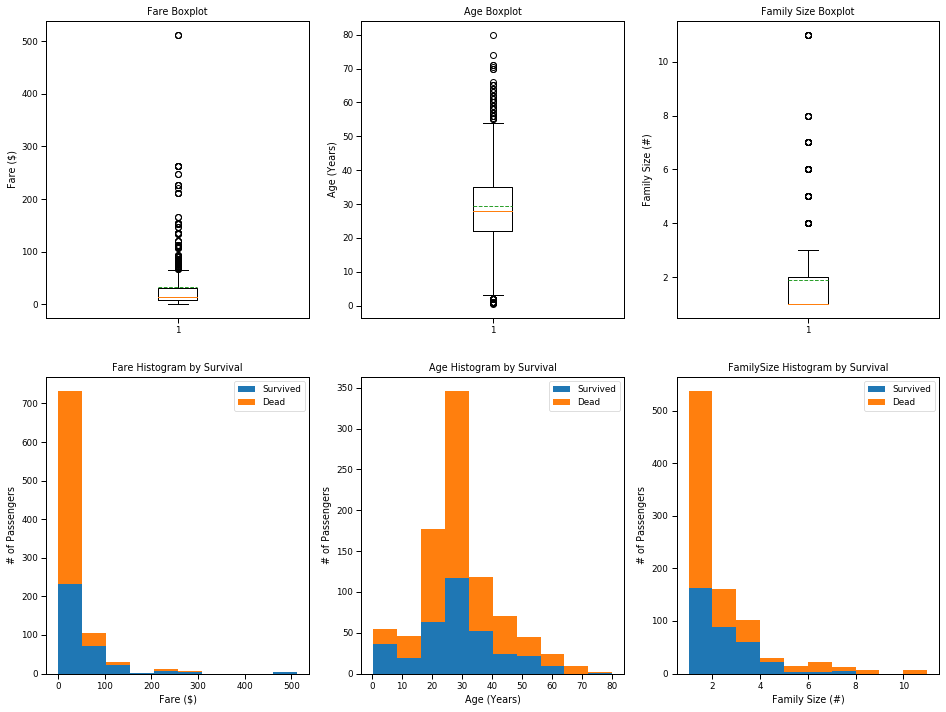

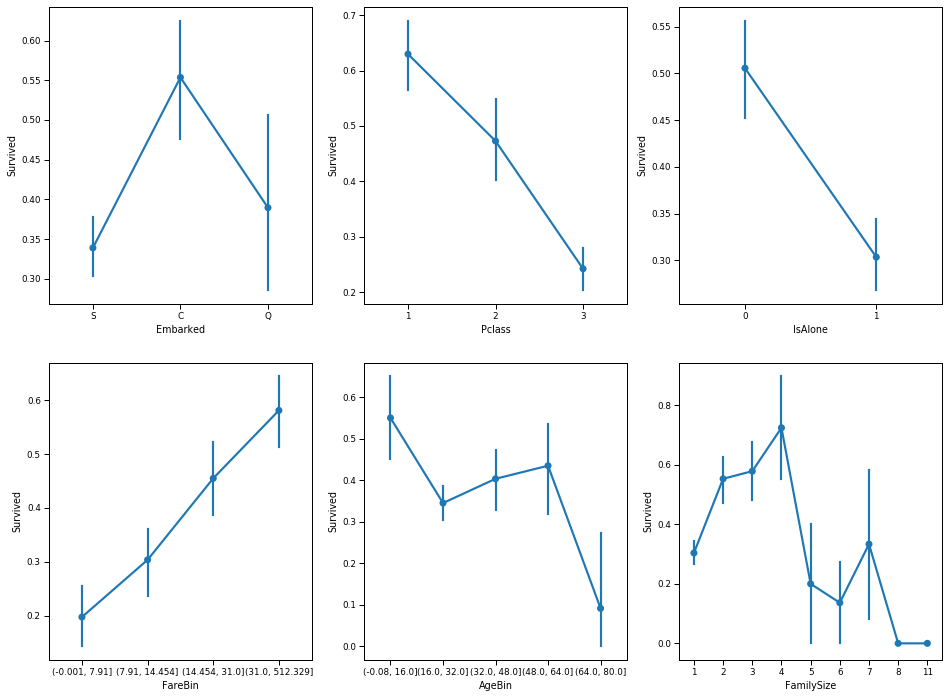

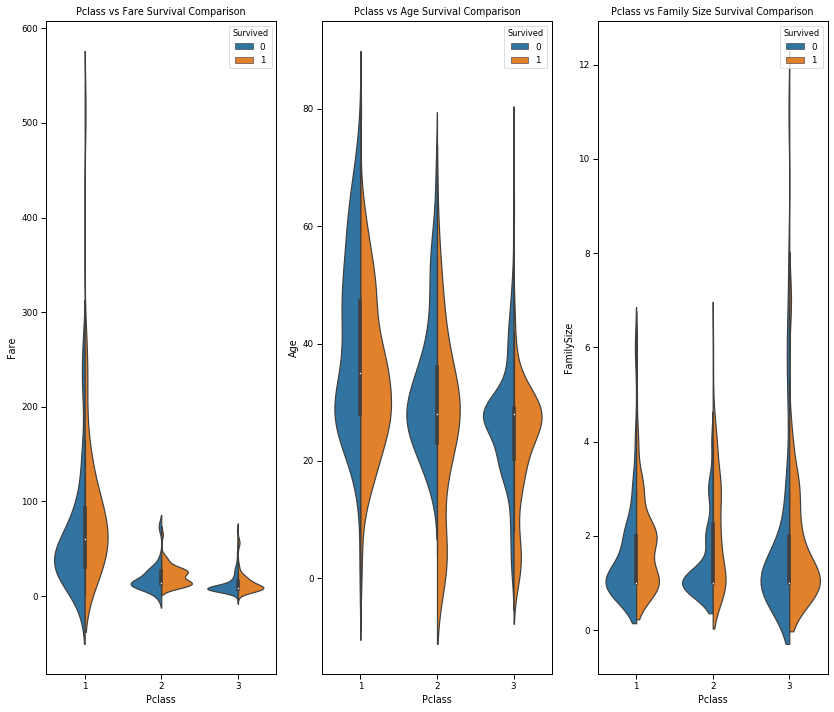

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


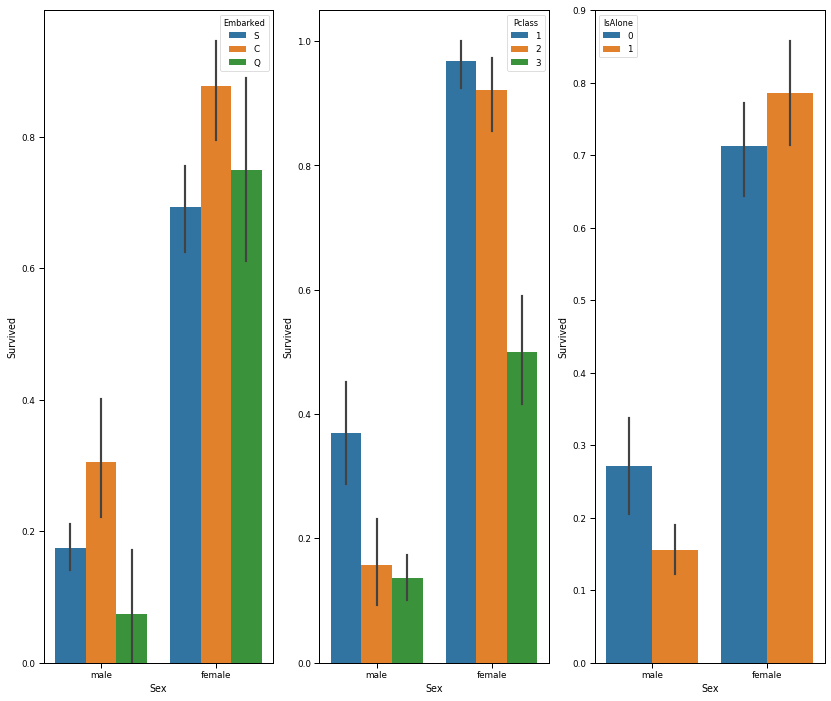

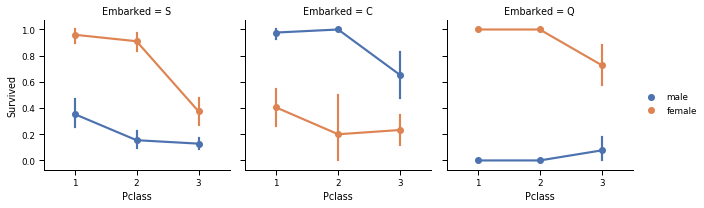

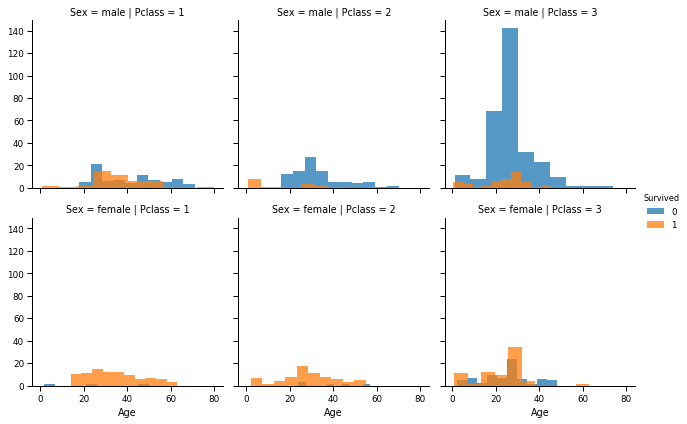

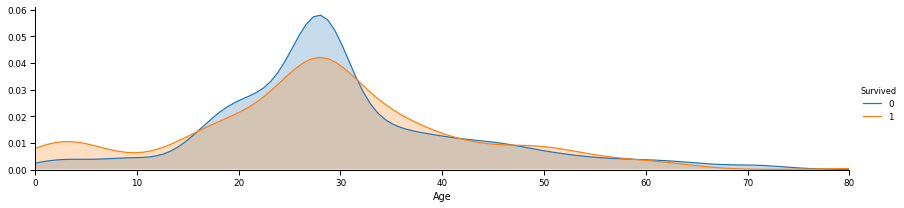

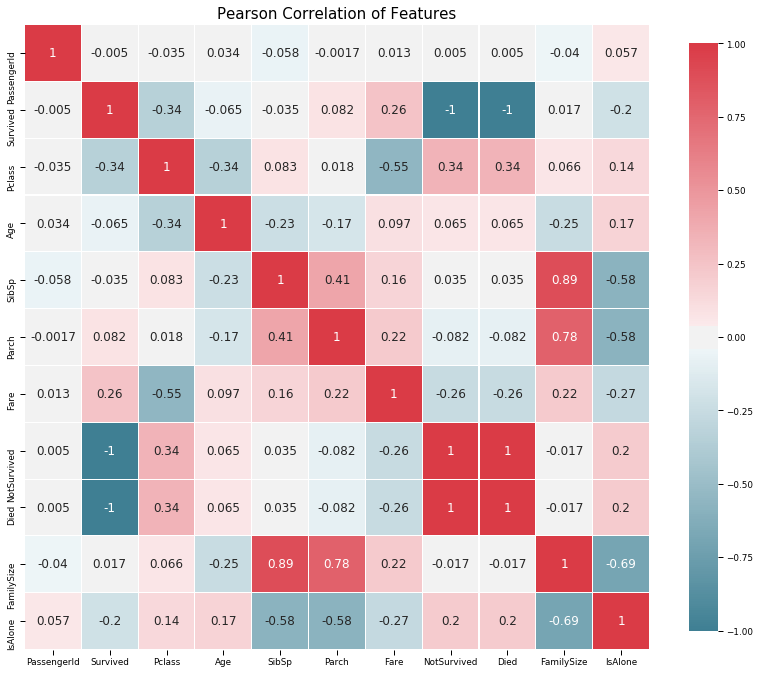

In [136]:
# main 
## Baseline analysis
baseline_analysis()

Target = ['Survived']
data1_x = ['Sex','Pclass', 'Embarked', 'SibSp', 'Parch', 'Age', 'Fare'] # pretty name/values for charts

ba_target(Target[0])

ba_categoral(Target[0])
ba_categoral_cor(Target[0])
ba_conti(Target[0])

# custom EDA
ba_age()
ba_sex()
ba_embarked()
ba_name()

## Clearning
clearning_correcting()

cleaning_completing_view()
cleaning_completing()
cleaning_completing_view()

cleaning_converting_fe()

## Eda
eda_cor()
eda_plot_conti()
eda_plot_mult()
eda_plot_mult3()
eda_plot_mult4()
# eda_pair()
eda_conti_age()
correlation_heatmap(d_train)